# Seaborn | Part-3: Matplotlib v/s Seaborn 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### sns.distplot():
- Flexibly plot a univariate distribution of observations.
- This function combines the matplotlib hist function (with automatic calculation of a good default bin size)
  with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the 
  estimated PDF over the data.

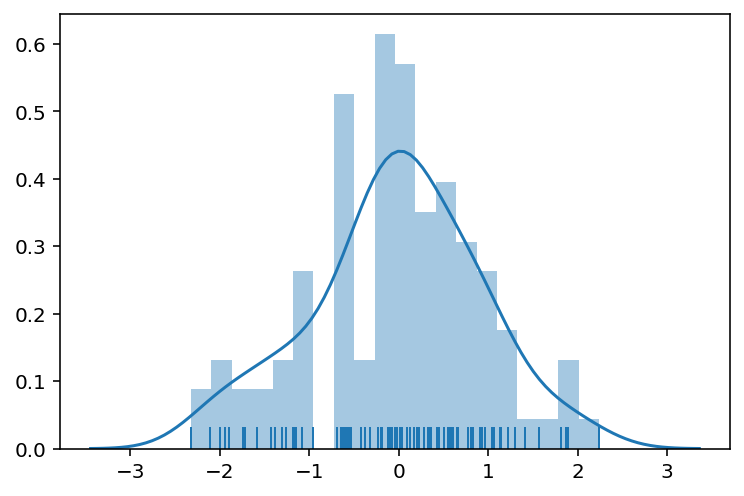

In [2]:
import warnings 
warnings.filterwarnings("ignore") 

x = np.random.normal(size=100)     # np.random.normal(x0=0.0, sigma=1.0, size=None)
sns.distplot(x, bins=20, kde=True, rug=True)   # gaussian kernel density estimate,
                                               # rugplot on the support axis. (think of it as 1-D scatter)

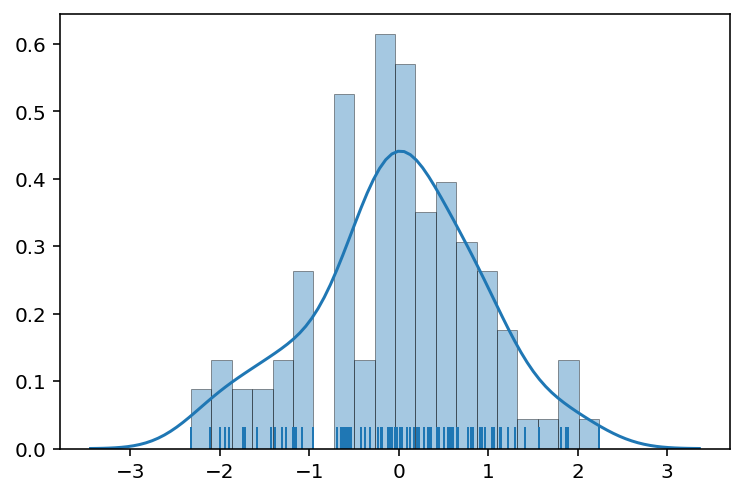

In [3]:
sns.distplot(x, bins=20, kde=True, rug=True, 
             hist_kws=dict(edgecolor='k', linewidth=0.5)) # hist_kws: keyword arguments for histogram

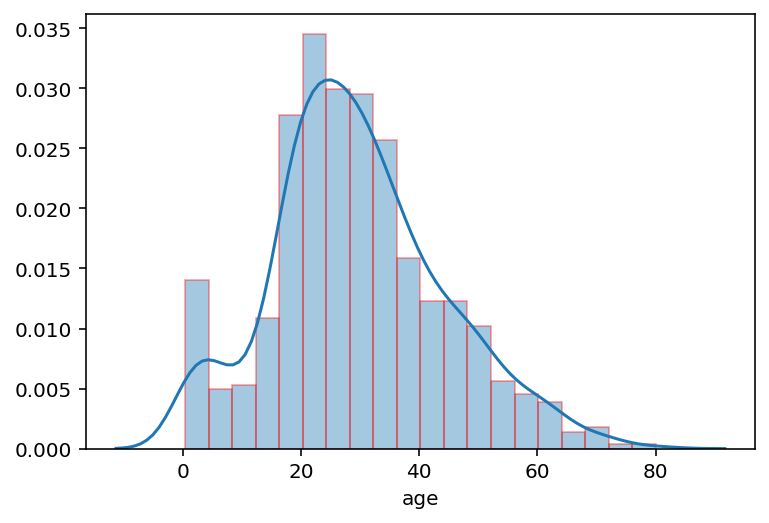

In [5]:
titanic = sns.load_dataset("titanic")

sns.distplot(titanic.age.dropna(), 
             hist_kws=dict(edgecolor='r', linewidth=0.8))  

- x 축의 시작 값을 0으로 설정할 수 있다. (임의의 범위로 설정)

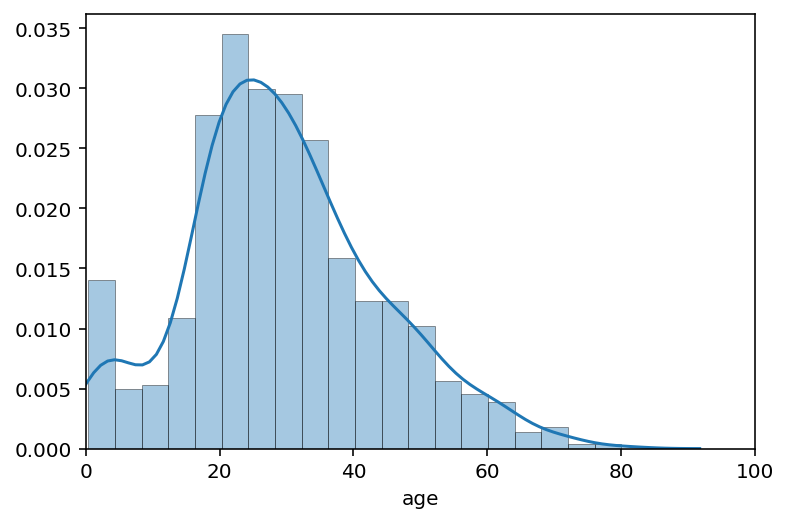

In [6]:
plt.xlim([0, 100])
sns.distplot(titanic.age.dropna(), 
             hist_kws=dict(edgecolor='k', linewidth=0.5))

In [7]:
### exercise for poly1d() to construct the polynomial x^2 + 2x + 3:
p = np.poly1d([1, 2, 3])   # A one-dimensional polynomial class.
print(np.poly1d(p))
type(p)

   2
1 x + 2 x + 3


numpy.poly1d

### polyfit()
- Least squares polynomial fit.
- Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). 
  Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0

In [8]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [3,5,7,10,11,12,14,15,19,25]

fit = np.polyfit(x,y,deg=1)  # degree of the fitting polynomial
# x로부터 y를 예측하는 선형 모델을 만든다
fit_fn = np.poly1d(fit)

In [9]:
fit_fn

poly1d([2.11515152, 0.46666667])

(0, 30)

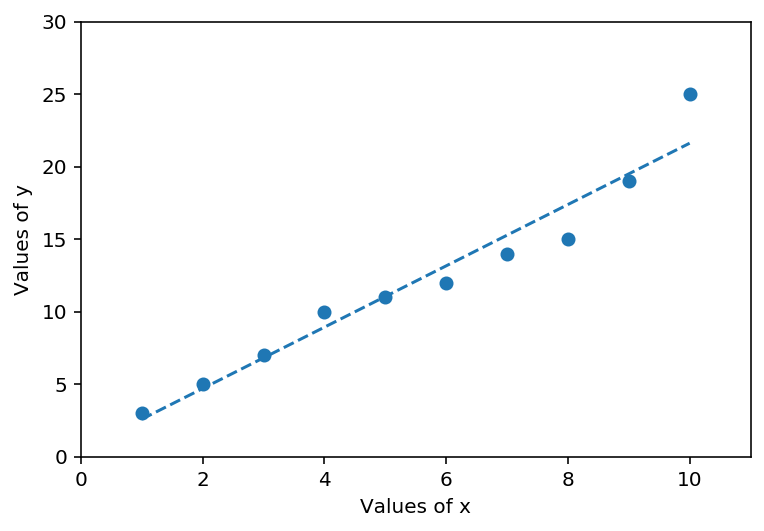

In [12]:
plt.plot(x,y, 'yo', x, fit_fn(x), '--', color='C0')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.xlim(0, 11)
plt.ylim(0, 30)

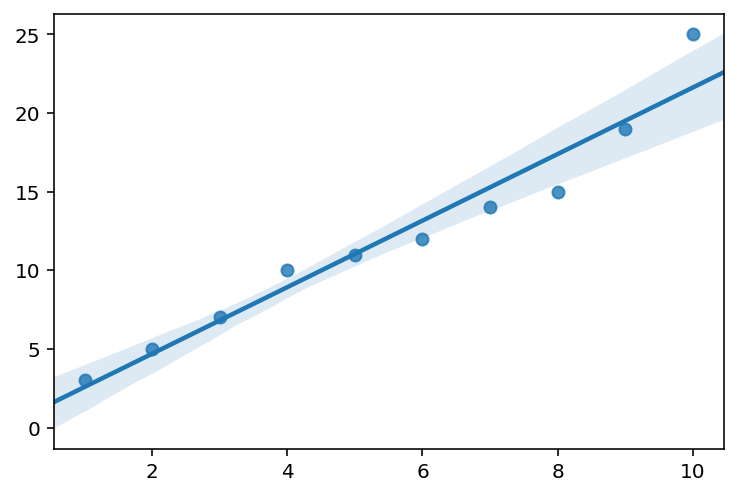

In [14]:
# ot data and a linear regression model fit.
sns.regplot(x, y)

In [15]:
# linregress는 LSR (least-squares Regression)을 사용한다 
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=2.1151515151515152, intercept=0.4666666666666668, rvalue=0.9717076499418887, pvalue=2.7091468499697177e-06, stderr=0.18176766975113706)

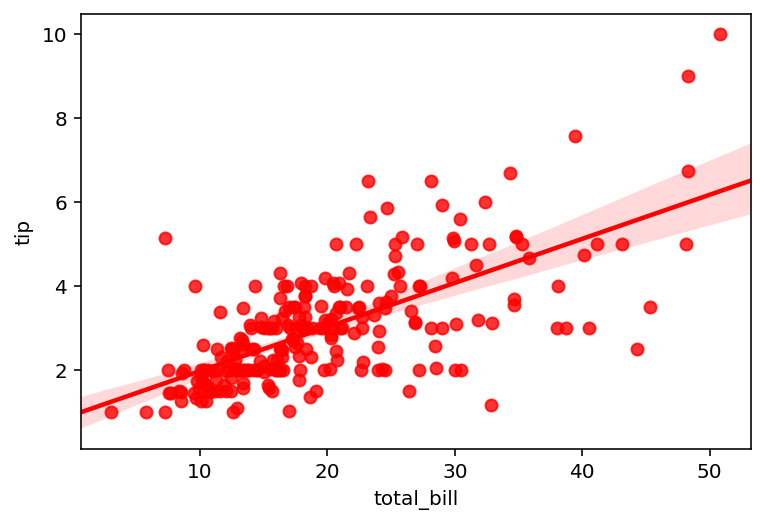

In [18]:
tips = sns.load_dataset("tips")
# sns.regplot(x="total_bill", y="tip", data=tips)
sns.regplot(x="total_bill", y="tip", data=tips, color="r")

### Pairplot()

In [19]:
nobs, nvars = 100, 5
data = np.random.random((nobs, nvars))
columns = ['Variable {}'.format(i) 
           for i in range(1, nvars + 1)]
df = pd.DataFrame(data, columns=columns)
df.head()

Variable 1  Variable 2  Variable 3  Variable 4  Variable 5
0    0.187518    0.373454    0.986823    0.472274    0.067258
1    0.841751    0.617437    0.339646    0.793629    0.628288
2    0.450479    0.490378    0.230866    0.156305    0.138330
3    0.720462    0.162328    0.697056    0.745598    0.137581
4    0.345364    0.854892    0.429087    0.724763    0.773625

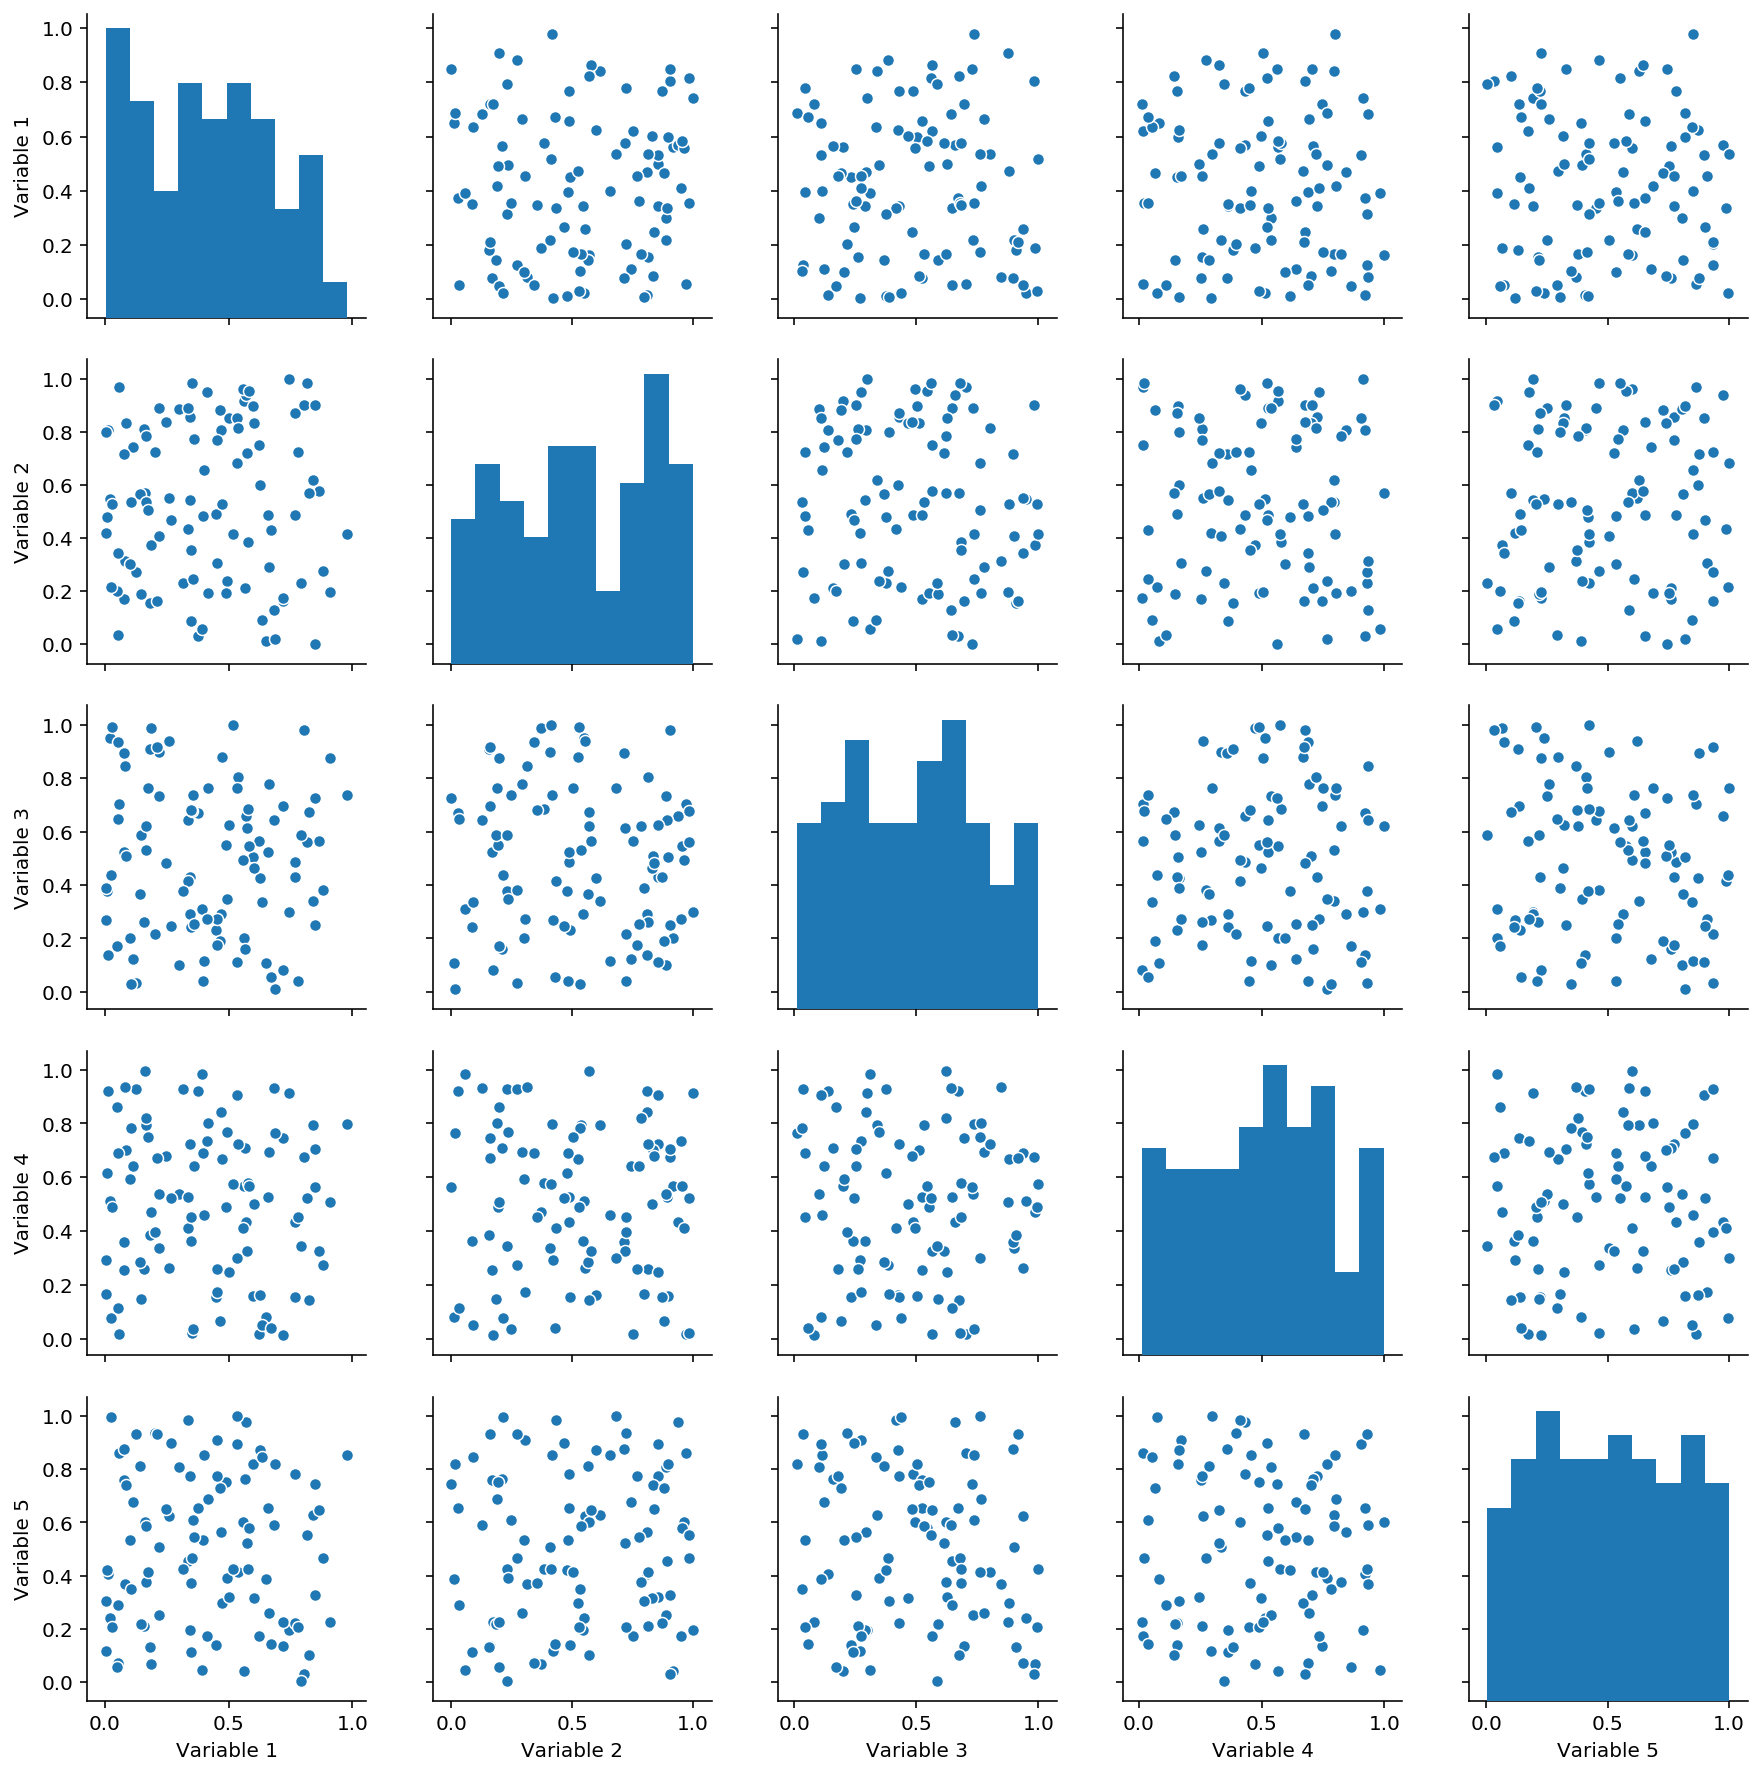

In [20]:
sns.pairplot(df)

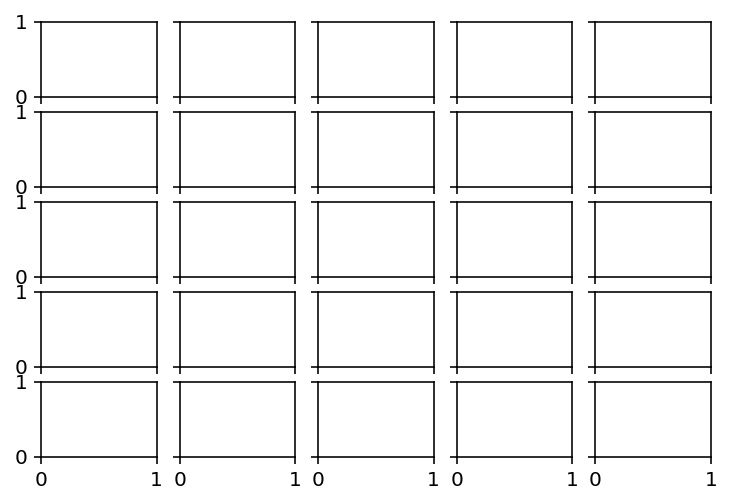

In [24]:
# Generatig Data:
nobs, nvars = 100, 5
data = np.random.random((nobs, nvars))
columns = ['Variable {}'.format(i) for i in range(1, nvars + 1)]

# Making a pairplot:
fig, axes = plt.subplots(ncols=nvars, nrows=nvars, sharex='col', sharey='row')

In [25]:
for x in np.ndenumerate(axes):   # multi-dimensional index iterator
    print(x)

((0, 0), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB2686C438>)
((0, 1), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB28718208>)
((0, 2), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB2876CB38>)
((0, 3), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB2851FF60>)
((0, 4), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB2855B3C8>)
((1, 0), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB2858D7F0>)
((1, 1), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB260CD1D0>)
((1, 2), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB25FC3860>)
((1, 3), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB2631D198>)
((1, 4), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB260FDFD0>)
((2, 0), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB26903D68>)
((2, 1), <matplotlib.axes._subplots.AxesSubplot object at 0x000002CB26010710>)
((2, 2), <matplotlib.axes._subplots.AxesSubplot obje

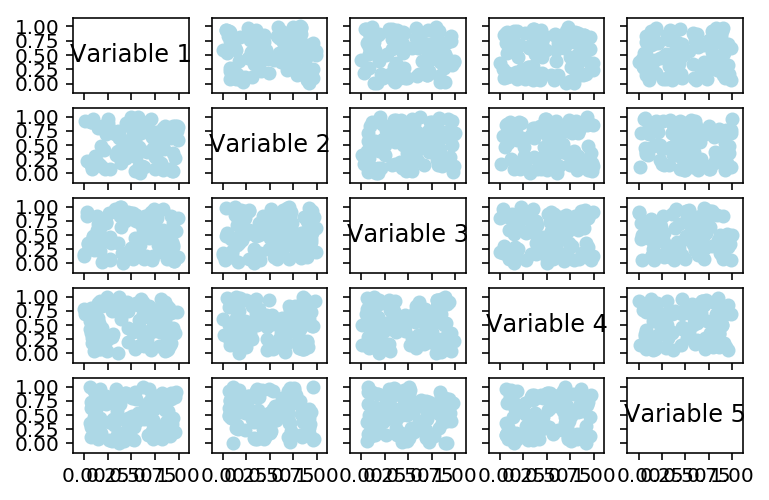

In [12]:
for (i, j), ax in np.ndenumerate(axes):
    if i == j:
        ax.annotate(columns[i], (0.5, 0.5), xycoords='axes fraction',
                    ha='center', va='center', size='large')
    else:
        ax.scatter(data[:,i], data[:,j], color='lightblue')
    ax.locator_params(nbins=6, prune='both')

plt.show()

### np.ndenumerate()
- Multidimensional index iterator.
- Return an iterator yielding pairs of array coordinates and values.

In [38]:
a = np.array([[1, 2], [3, 4]])
print(a)
for index, x in np.ndenumerate(a):
    print(index, x)

[[1 2]
 [3 4]]
(0, 0) 1
(0, 1) 2
(1, 0) 3
(1, 1) 4
